In [3]:
import numpy as np
import matplotlib.pyplot as plt

import rpy2.robjects as ro
from rpy2.robjects import pandas2ri

In [2]:
# Activate the conversion to pandas
pandas2ri.activate()

# Read the RDS file using R's readRDS function
ro.r('my_object <- readRDS("data/Figure5c.RDS")')

# Retrieve the R object
my_object = ro.r['my_object']

# Extract the data frame (assuming it's stored under the "data" element)
volcano_data = my_object.rx2('data')

# Convert the R data frame to a pandas DataFrame
volcano_df = pandas2ri.rpy2py(volcano_data)

# Preview the data
print(volcano_df.head())

,humanSymbol,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Sig,lab,xvals,yvals
1,AATF,Aatf,1042.865492,0.101737,0.134915,0.754083,4.507996e-01,5.224041e-01,1,None,0.101737,5.224041e-01
2,ABCB10,Abcb10,103.653703,0.188265,0.098612,1.909142,5.624382e-02,8.452675e-02,1,None,0.188265,8.452675e-02
3,ABCC1,Abcc1,722.107038,-0.325590,0.130770,-2.489794,1.278173e-02,2.225977e-02,1,None,-0.325590,2.225977e-02
4,ABL1,Abl1,655.283252,-0.098585,0.102026,-0.966269,3.339095e-01,4.051378e-01,1,None,-0.098585,4.051378e-01
5,ABRAXAS1,LOC100769554,233.399295,-0.663836,0.111309,-5.963915,2.462652e-09,1.325556e-08,3,None,-0.663836,1.325556e-08
...,...,...,...,...,...,...,...,...,...,...,...,...
1198,ZNF385A,Znf385a,157.256220,0.272411,0.201820,1.349771,1.770893e-01,2.334635e-01,1,None,0.272411,2.334635e-01
1199,ZNF622,Znf622,381.816640,0.603975,0.085721,7.045827,1.843630e-12,1.522414e-11,3,None,0.603975,1.522414e-11
1200,ZNF830,Znf830,139.027752,-0.062597,0.081826,-0.764995,4.442747e-01,5.161519e-01,1,None,-0.062597,5.161519e-01
1201,ZRANB3,Zranb3,129.493618,-0.291359,0.108834,-2.677089,7.426492e-03,1.365027e-02,1,None,-0.291359,1.365027e-02


/Users/pablodigiusto/miniforge3/envs/secretome_paper/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


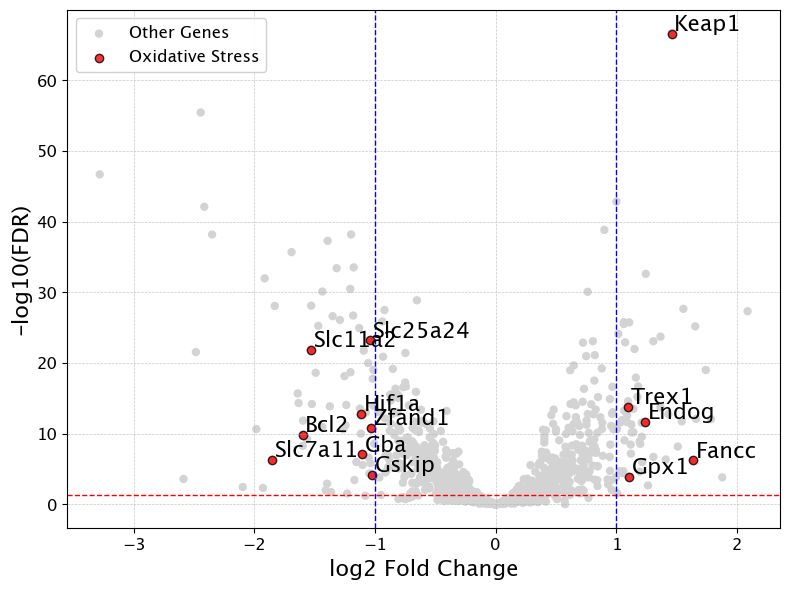

In [24]:
import numpy as np
import matplotlib.pyplot as plt


# Map the incorrect gene name to the correct one
volcano_df.loc[volcano_df["gene"] == "LOC100754168", "gene"] = "Slc25a24"

# Calculate -log10 of the adjusted p-values (FDR)
volcano_df["negLog10Padj"] = -np.log10(volcano_df["padj"])

# Define the list of ox genes to highlight
ox_genes = ['Keap1', 'Trex1', 'Endog', 'Fancc', 'Gpx1', 'Gskip', 'Slc25a24', 'Zfand1', 'Hif1a',
            'Gba', 'Slc7a11', 'Bcl2', 'Slc11a2']
# Convert to lower-case for case-insensitive matching
ox_genes_lower = [gene.lower() for gene in ox_genes]

# Create a boolean mask for rows where the 'gene' column matches one of the ox_genes
mask_ox = volcano_df["gene"].str.lower().isin(ox_genes_lower)

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot all points in gray with alpha=0.6
ax.scatter(volcano_df["log2FoldChange"], volcano_df["negLog10Padj"],
           color="lightgray", alpha=1, label="Other Genes", edgecolor='none')

# Overlay the selected ox_genes in red with a black edge for emphasis
ax.scatter(volcano_df.loc[mask_ox, "log2FoldChange"],
           volcano_df.loc[mask_ox, "negLog10Padj"],
           color="red", alpha=0.8, label="Oxidative Stress", edgecolor='black')

# Add annotations for the highlighted ox genes with a smaller offset and larger, bold font
for idx, row in volcano_df[mask_ox].iterrows():
    ax.annotate(row["gene"],
                (row["log2FoldChange"], row["negLog10Padj"]),
                textcoords="offset points", xytext=(2, 2),
                ha="left", fontsize=16, fontweight='bold')

# Draw threshold lines for visual reference
fdr_threshold = 0.05
log2fc_threshold = 1
ax.axhline(-np.log10(fdr_threshold), color="red", linestyle="--", linewidth=1)
ax.axvline(x=log2fc_threshold, color="blue", linestyle="--", linewidth=1)
ax.axvline(x=-log2fc_threshold, color="blue", linestyle="--", linewidth=1)

# Set labels with larger fonts
ax.set_xlabel("log2 Fold Change", fontsize=16)
ax.set_ylabel("-log10(FDR)", fontsize=16)

# Add a grid with customized style
ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Adjust tick parameters for better readability
ax.tick_params(axis='both', which='major', labelsize=12)

# Add legend with a frame
ax.legend(fontsize=12, frameon=True, framealpha=0.9)

plt.tight_layout()

plt.savefig("results/fig_5C.svg", dpi=300, format="svg")

plt.show()